<a href="https://colab.research.google.com/github/vineet891/DL-Assignment/blob/dev/DL_ASSIGNMENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

#**LOADING DATA**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

#**PREPROCESSING**

In [4]:
def preProcess(x_train, x_test,y_train, y_test):
  x_train = x_train/255
  x_test = x_test/255
  
  visualize(x_train,y_train)

  # one hot encoding the target variable
  y_train = to_categorical(y_train, 10)
  y_test = to_categorical(y_test, 10)

  x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
  x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

  # split the training data into validation set and training set
  X_valid, X_train = x_train[:5000], x_train[5000:]
  Y_valid, Y_train = y_train[:5000], y_train[5000:]

  return X_train, x_test,X_valid, Y_train, y_test, Y_valid



In [5]:
# sample datapoints from the train set
def visualize(x_train,y_train):
  plt.figure(figsize=(10, 10))
  for i in range(36):
      plt.subplot(6, 6, i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x_train[i].reshape((28,28)))
      label_index = int(y_train[i])
      plt.title(class_names[label_index])
  plt.show()

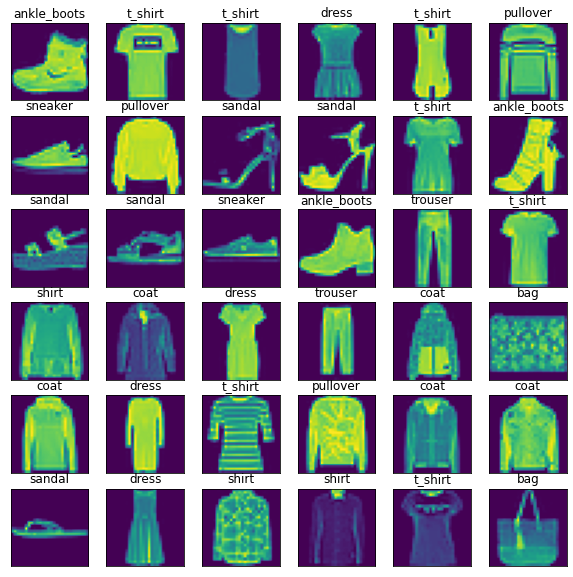

In [6]:
X_train, x_test,X_valid, Y_train, y_test, Y_valid = preProcess(x_train, x_test,y_train, y_test)

In [7]:
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
model = tf.keras.models.Sequential([
                              tf.keras.layers.Conv2D(64, kernel_size=7, activation='relu', padding="SAME",input_shape=[28, 28, 1]),
                              tf.keras.layers.MaxPooling2D(pool_size=2),
                              tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding="SAME"),
                              tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding="SAME"),
                              tf.keras.layers.MaxPooling2D(pool_size=2),
                              tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding="SAME"),
                              tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding="SAME"),
                              tf.keras.layers.MaxPooling2D(pool_size=2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(units=128, activation='relu'),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(units=64, activation='relu'),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(units=10, activation='softmax'),
	
])

# compile model
# opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [9]:
history = model.fit(X_train,Y_train,epochs=30, validation_data=(X_valid, Y_valid))

Epoch 1/30
1719/1719 [==============================] - 38s 17ms/step - loss: 1.3813 - accuracy: 0.4891 - val_loss: 0.6900 - val_accuracy: 0.7430
Epoch 2/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.8036 - accuracy: 0.7049 - val_loss: 0.5418 - val_accuracy: 0.7962
Epoch 3/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.6591 - accuracy: 0.7621 - val_loss: 0.4646 - val_accuracy: 0.8220
Epoch 4/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.5823 - accuracy: 0.7911 - val_loss: 0.4210 - val_accuracy: 0.8452
Epoch 5/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.5317 - accuracy: 0.8136 - val_loss: 0.4027 - val_accuracy: 0.8484
Epoch 6/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.4980 - accuracy: 0.8245 - val_loss: 0.3807 - val_accuracy: 0.8566
Epoch 7/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.4721 - accuracy: 0.8377 - val_loss: 0.3520 -

Text(0.5, 1.0, 'Train - Accuracy')

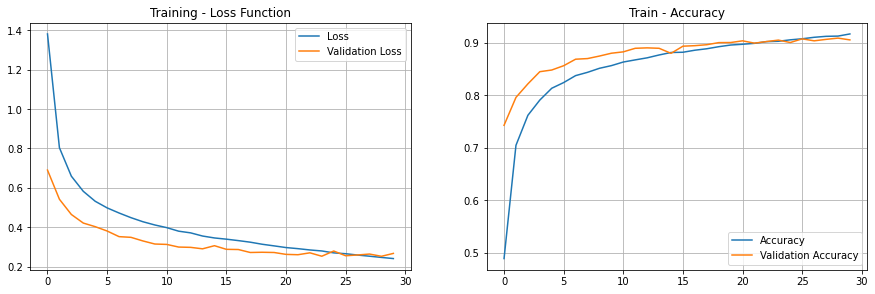

In [10]:
# plot the Loss vs epochs and Accuracy vs Epochs charts
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.3024 - accuracy: 0.8993


[0.3023803234100342, 0.8992999792098999]

-----------------Convolutional Neural Network Report---------------
F1 score: 0.898209271204414
Accuracy score: 0.8993
Confusion matrix: 
 [[819   0  15  56   4   1  90   1  14   0]
 [  0 964   0  25   7   0   3   0   1   0]
 [ 13   0 827  13 103   0  40   0   4   0]
 [  6   0   3 934  40   0  14   0   3   0]
 [  0   0  41  26 913   0  19   0   1   0]
 [  0   0   0   0   0 957   0  27   0  16]
 [100   0  58  52 134   1 651   0   4   0]
 [  0   0   0   0   0   5   0 976   0  19]
 [  1   0   0   3   2   0   0   6 988   0]
 [  0   0   1   0   0   3   0  32   0 964]]
Plotting confusion matrix


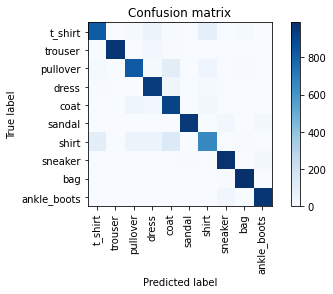

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       1.00      0.96      0.98      1000
           2       0.88      0.83      0.85      1000
           3       0.84      0.93      0.89      1000
           4       0.76      0.91      0.83      1000
           5       0.99      0.96      0.97      1000
           6       0.80      0.65      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [12]:
cnn_pred_mnist = model.predict(x_test)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(y_test,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
cnn_accuracy_mnist = metrics.accuracy_score(y_true, cnn_pred_mnist)
cnn_cm_mnist = metrics.confusion_matrix(y_true, cnn_pred_mnist)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1_mnist))
print("Accuracy score: {}".format(cnn_accuracy_mnist))
print("Confusion matrix: \n", cnn_cm_mnist)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_cm_mnist, class_names)
plt.show()

print(metrics.classification_report(y_true, cnn_pred_mnist))

In [13]:
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from IPython.display import SVG

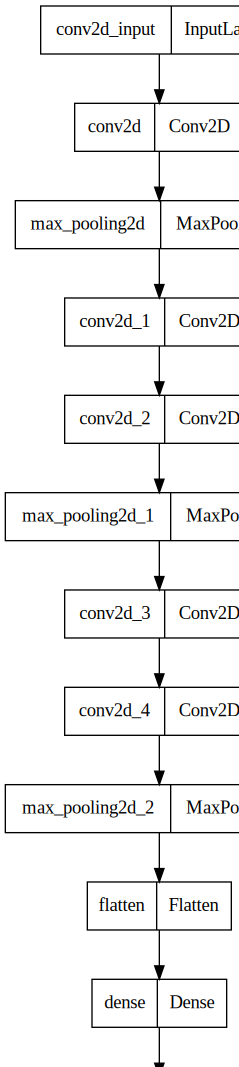

In [14]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
from google.colab import files
plt.savefig("model.png")
files.download("model.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>